# Deep Learning - Global Solution

## Projeto: Hotel booking demand
## Professor Hellynson Lana

# Importar Biblioteca

In [217]:
import pandas as pd
import seaborn as sns
import datetime
import pandas_bokeh


pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource
import  matplotlib.pyplot as plt

Loading BokehJS ...

# Importar Dados

Dataset referente ao negócio de agendamento de estadias em hoteis (booking),  retirado do site https://www.kaggle.com/jessemostipak/hotel-booking-demand.

In [20]:

df_raw = pd.read_csv("Airbnb/hotel_bookings.csv",parse_dates=['reservation_status_date'], dayfirst=True)
df = df_raw.copy()

# Tratar Dados

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# Análise Exploratória

**Qual é o tamanho da base?** \
Verificamos que o dataset possui 119390 linhas e 32 colunas

In [6]:
df.shape

(119390, 32)

**Quais são os tipos de dados existentes?** \
Temos dados do tipo string (colunas com texto, ex: "Deposit"), int(colunas com números inteiro, ex: 303) , date(colunas com data, ex: "2015-07-01"), float(colunas com texto, ex: "Deposit") and boleano (colunas com apenas 2 valores únicos 0 ou 1, tal como a coluna "is_canceled").

In [7]:
df.is_canceled.unique()

array([0, 1], dtype=int64)

In [8]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

**Existes dados faltantes? Quantos?** \ 

Sim. Há 4 colunas com quantidades diferentes de dados faltantes. Na coluna "Children" há 4 linhas faltatnes, na "country" 488 linhas, na "agent" 16340 linhas e na "company" 112593 linhas faltantes. 

In [10]:
df.isnull().sum().sort_values().tail(6)

arrival_date_year         0
lead_time                 0
children                  4
country                 488
agent                 16340
company              112593
dtype: int64

## Perfil de Viajantes

**Períodos do ano de maior viagem** 

O dataset apresentado possui apenas 1 ano completo (2016) e os anos de 2015 e 2017 inclompletos, sendo possível uma análise equivocada da série temporal. \
Com os dados apresentados, os dados sugerem um crescente aumento de usuários da plataforma de booking (infelizmente no ano 2017 não foi disponibilizados o ano completo de dados, porém até o mês de Agosto, foi observado uma quantidade de hospedagens semelhantes ao ano de 2016, sendo difícil descartar a possibilidade que o aplicativo/hospedagem tenha decaído nos próximos meses.)
Interessante observar que **os meses de Março, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro e Novembro** possuem quantidade próximas total de hospedagem.  


In [147]:
#Criar colunas de mês e ano para melhor segregar temporalmente
df['ano'] = df['reservation_status_date'].dt.year
df['mes'] = df['reservation_status_date'].dt.month

#criação de subsets para avaliar a quantidade de hospedagens ao longo do tempo disponibilizado.
dados = df[['hotel', 'is_canceled','ano', 'mes']].query('is_canceled == 0')
dados_mes = dados[['hotel','mes']].groupby(['mes']).count()
dados_ano = dados[['hotel','ano']].groupby(['ano']).count()
dados_ano_mes = dados[['hotel','ano','mes']].groupby(['ano','mes']).count()


#plot de gráficos -> Hospedagem distribuido nos anos
graf_ano = dados_ano.plot_bokeh(kind="line",title ="Distribuição de Hospedagens por Ano",
                   #figsize =(500,300),
                   xlabel = "Ano",
                   ylabel="Quantidade de Hospedagens",
                   show_figure=False
                   )

#plot de gráficos -> Hospedagem distribuido nos meses
graf_mes = dados_mes.plot_bokeh(kind="line",title ="Distribuição de Hospedagens por Mês",
                   #figsize =(500,300),
                   xlabel = "Mês",
                   ylabel="Quantidade de Hospedagens",
                   show_figure=False
                   )


# Combinar graficos via grid layout:
pandas_bokeh.plot_grid([[graf_ano, graf_mes]], plot_width=500, plot_height=350)

#plot de gráficos -> Hospedagem distribuido ao longo dos anos e meses
graf_ano_mes = dados_ano_mes.plot_bokeh(kind="line",title ="Distribuição de Hospedagens por Ano/Mês",
                   figsize =(1000,300),
                   xlabel = "Ano/Mês",
                   ylabel="Quantidade de Hospedagens",
                   #show_figure=False
                   )


**Dias da semana com maior utilização dos hotéis** \
Aparentemente há uma preferência maior para as hospedagens aos **Domingos**, sendo a **Segunda, Quinta e Sexta** os 3 dias da semana com maior quantidade de hospedagens. 

In [392]:
#Criação de coluna com os dias da semana
df['dia_semana'] = df['reservation_status_date'].dt.day_name()

#Criação de subset onde é considerado apenas as hospedagens que não foram canceladas. 
dados = df[['hotel', 'is_canceled','dia_semana']].query('is_canceled == 0')

#Subset com agrupando as hospedagens nos dias da semana
dados_dia_semana = dados[['hotel','dia_semana']].groupby(['dia_semana']).count().sort_values(by = "hotel")
graf_ano_mes = dados_dia_semana.plot_bokeh(kind="bar",title ="Distribuição de Hospedagens Durante a Semana",
                   figsize =(700,400),
                   xlabel = "Dia da Semana",
                   ylabel="Quantidade de Hospedagens",
                   show_figure=True
                   )

**Perfil da reserva (quantos adultos? Tem filhos? Bebês? Viajante que retorna ou mesmo hotel?**\

Com o dataset apresentado podemos observar que a maioria dos hóspedes (95,6%) não retornam ao mesmo hotel. O perfil dos viajantes/hóspedes são de 2 ou 1 adultos, respondendo a 86% das hospedagens realizadas. O terceiro perfil mais frequente (4,9%) é de grupo de 3 adultos , o quarto (3,5%) é de 2 adultos e 1 criança e o quinto perfil é de 2 adultos e 2 crianças(2,4).Apenas em sexto lugar (0,77%) é que observamos 2 adultos com 1 bebê se hospedando. Este últivo, possívelmente apresenta grande dificuldade logística e preocupação com a alimentação e bem estar da criança durante o trânsito até o local. 

In [130]:
#O Viajante retorna ao mesmo hotel? 
hospede_recorrente = df_perfil_viajantes[['hotel','is_repeated_guest']].groupby(['is_repeated_guest']).count().sort_values(by = "hotel").apply(lambda x: 100*x/x.sum())

#Seleção de hospedagens confirmadas apenas. 
df_perfil_viajantes = df.query('is_canceled == 0').copy()

#Substittuindo valores de NA, onde provavelmente o NA significa a não existência de crianças na hospedagem. 
df_perfil_viajantes['children'] = df_perfil_viajantes['children'].fillna(0).astype(int)


#Seleção de colunas para  o dataset.
viajantes = df_perfil_viajantes[['hotel', 'is_canceled','adults', 'children', 'babies']].query('is_canceled == 0')

#Mudança de Tipo de dado de Número para Texto, com intuito de criar um código para representar as diferentes combinações de hospedagem de adultos, crianças e bebes.
df_perfil_viajantes[['adults', 'children', 'babies']] = df_perfil_viajantes[['adults', 'children', 'babies']].astype(str)
viajantes['perfil'] = viajantes['adults']+"-"+viajantes[ 'children']+"-"+viajantes['babies']
#viajantes_perfil = viajantes[['hotel','adults', 'children', 'babies']].groupby(['adults', 'children', 'babies']).count()
viajantes_perfil = viajantes[['hotel','perfil']].groupby(['perfil']).count().sort_values(by = "hotel")
tabela1 = viajantes_perfil.apply(lambda x: 100*x/x.sum()).tail(10)


print("Considerando apenas os hospedes que não cancelaram suas estadias (is_canceled == 0), temos a seguinte visáo do perfil de hospedes.")
print("Apenas 4,33% dos hospedes retornaram ao mesmo hotel. ")
print(hospede_recorrente)


print("\n \n 85% das hospedagens foram realizadas por 2 adultos (65%) e  1 adulto(21%). Perfil de hospedes com 1 ou duas crianças aparecem em 3o (3,5%) e 4o (2,4%), respectivamente, no ranking. Hospedagens realizadas com bebês aparecem apenas em 5a colocação (0,77%), com a reserva para 1 bebê.")
print("\n OBS: O código para a descrição dos perfis de hospedagem segue a seguinte sequência: Perfil= ADULTOS-CRIANÇAS-BEBÊS \n")
print(tabela1)
print("\n \n" )

graf_perfil_viajantes = viajantes_perfil.plot_bokeh(kind="barh",title ="Perfil dos Hóspedes",
                   figsize =(500,500),
                   xlabel = "Quantidade de Hospedagens",
                   ylabel="Perfil",
                   show_figure=True
                   )



Considerando apenas os hospedes que não cancelaram suas estadias (is_canceled == 0), temos a seguinte visáo do perfil de hospedes.
Apenas 4,33% dos hospedes retornaram ao mesmo hotel. 
                       hotel
is_repeated_guest           
1                   4.334407
0                  95.665593

 
 85% das hospedagens foram realizadas por 2 adultos (65%) e  1 adulto(20%). Perfil de hospedes com 1 ou duas crianças aparecem em 3o (3,5%) e 4o (2,4%), respectivamente, no ranking. Hospedagens realizadas com bebês aparecem apenas em 5a colocação (0,77%), com a reserva para 1 bebê.

 OBS: O código para a descrição dos perfis de hospedagem segue a seguinte sequência: Perfil= ADULTOS-CRIANÇAS-BEBÊS 

            hotel
perfil           
0-2-0    0.166299
0-0-0    0.206210
1-1-0    0.282042
3-1-0    0.364527
2-0-1    0.772956
2-2-0    2.433281
2-1-0    3.566772
3-0-0    4.970332
1-0-0   21.315488
2-0-0   65.369981

 



**Qual é alista de países únicos de origem dos viajantes?**


In [396]:
#Lista dos paises únicos de origem dos viajantes 
df.country.dropna().unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

**Visualização: tracem pelo menos 3 gráficos distintos que julgar interessantes, mostrando relação entre os dados. Utilize a biblioteca que preferir (Pandas, Seaborn, Matplotlib etc.). Não se esqueça das labels e títulos. Utilize comentários para explicar o que foi extraído de cada gráfico.**


**Para Onde Vão os Viajantes?** \ 

Com os dados apresentados, conseguimos distinguir os 10 países mais visitados, sendo sua maioria países europeus. Uma grande surpresa, foi observar Portugal como a principal destinação tanto para Hotéis na Cidade quanto para Hotéis Resorts. Com a distribuição de hospedagens é possível observar uma certa diferença de escolha do país quando o viajante escolhe ficar em um Resort ou em um Hotel na Cidade 

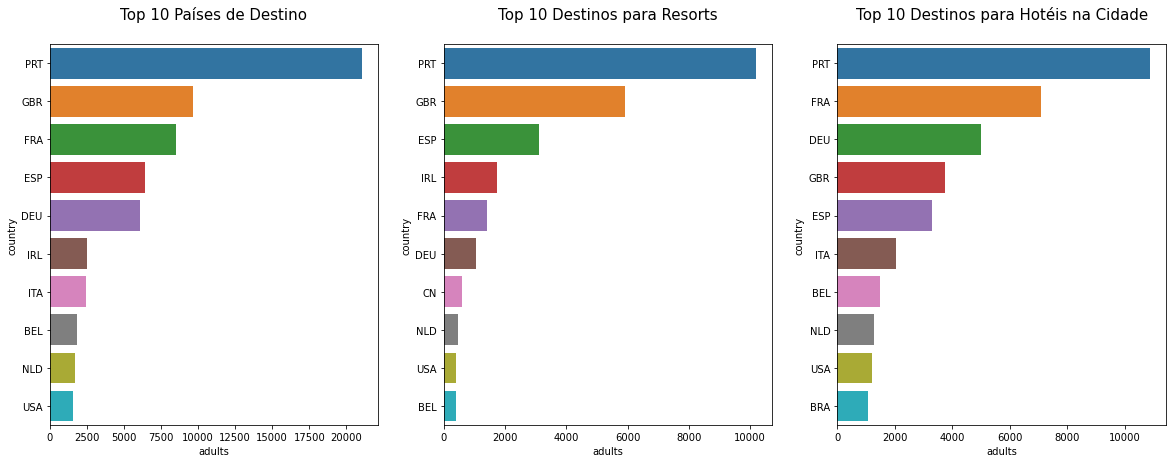

In [321]:
#Quantificando a quantidade de estadias, agrupando pelo tipo de hotel e por país. 
city_hotel = df_perfil_viajantes.query('hotel == "City Hotel"').groupby(['hotel',  'country']).count().sort_values(by = "lead_time",ascending=False).reset_index().head(10)
resort_hotel = df_perfil_viajantes.query('hotel == "Resort Hotel"').groupby(['hotel',  'country']).count().sort_values(by = "lead_time",ascending=False).reset_index().head(10)

#Quantificando a quantidade de estadias, agrupando por país para obter o país mais visitado em números absolutos. 
paises_destino = df_perfil_viajantes.groupby(['country']).count().sort_values(by = "lead_time",ascending=False).reset_index().head(10)

#Plotagem dos gráficos. 
plt.figure(figsize=(20, 7))

s1 = plt.subplot(1, 3, 3)
s1 = sns.barplot(data = city_hotel, x= 'adults',y='country')
s1 = plt.title('Top 10 Destinos para Hotéis na Cidade', x=0.5, y=1.05, ha='center', fontsize='15')

s2 = plt.subplot(1, 3, 2)
s2 =sns.barplot(data = resort_hotel, x= 'adults',y='country')
s2 =plt.title('Top 10 Destinos para Resorts', x=0.5, y=1.05, ha='center', fontsize='15')

s3 = plt.subplot(1, 3, 1)
s3 = sns.barplot(data = paises_destino, x= 'adults',y='country');
s3 = plt.title('Top 10 Países de Destino', x=0.5, y=1.05, ha='center', fontsize='15')


**Qual tipo de Hotel é mais atrativo para cada perfil de viajante?** \

Neste estudos, podemos observar uma preferência de viajantes compostas por adultos apenas e adultos com crianças de escolheres os hotéis na cidade para permanência. Possivelmente está relacionada a estar mais próxima as áreas de atrações da cidade e de crianças necessitarem de menos cuidado que bebês. Já viajantes com bebês apresentaram um "empate" entre a escolha de Resort e Hotéis na Cidade, a idéia de Resort para este tipo de perfil se torna mais próxima quando pensamos que em um Resort todas as atrações estarão próximas e os viajantes terão a comodidade de seu quarto caso algo aconteça.   

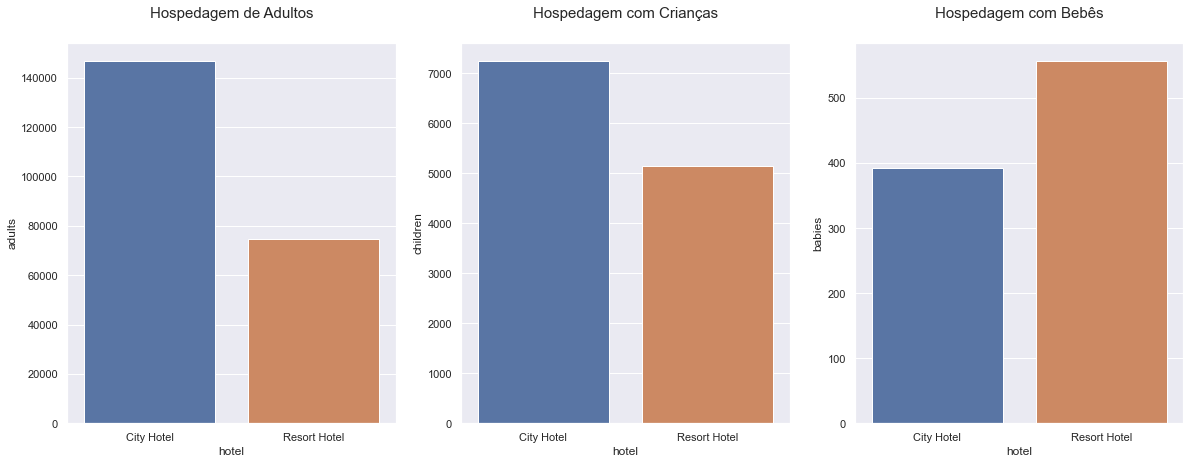

In [400]:
#Criação de um subset, onde os dados foram agrupados por tipo de Hotel e os valores numéricos somados para obter o valor absoluto de Adultos, Crianças e Bebes
aux1 = df[['hotel', 'is_canceled', 'lead_time','stays_in_weekend_nights','stays_in_week_nights', 
    'adults', 'children', 'babies', 'meal','is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled', 
    'reserved_room_type','assigned_room_type', 'booking_changes', 'days_in_waiting_list', 
    'adr','required_car_parking_spaces', 'total_of_special_requests','reservation_status']].groupby('hotel').sum().reset_index()


#Plotagem dos Gráficos
plt.figure(figsize=(20, 7))
sns.set(font_scale = 1)


s1 = plt.subplot(1, 3, 1)
s1 = sns.barplot(data = aux1, x= 'hotel',y='adults')
s1 = plt.title('Hospedagem de Adultos', x=0.5, y=1.05, ha='center', fontsize='15')

s2 = plt.subplot(1, 3, 2)
s2 =sns.barplot(data = aux1, x= 'hotel',y='children')
s2 =plt.title('Hospedagem com Crianças', x=0.5, y=1.05, ha='center', fontsize='15')

s3 = plt.subplot(1, 3, 3)
s3 = sns.barplot(data = aux1, x= 'hotel',y='babies');
s3 = plt.title('Hospedagem com Bebês', x=0.5, y=1.05, ha='center', fontsize='15')


**Como os viajantes realizam suas revervas ao se planejarem para ir nos top 15 países mais vistados?** \ 

Com a utilização do boxplot, é possível observar a distribuição do comportamento dos viajantes com relação a antecedência que as reservas são realizadas. \
Interessante observar que Portugal é o país mais visitado e também o com 4o quartil indicando um dos menores lead time,com padrão semelhante à Espanha. Será estes países considerados "dormitórios", já acostumados com esta ida e vinda de viajantes ou a rede hoteleira é tão eficiente e vasta que não há a necessidade de reservar com tanta antecedência a estadia? 

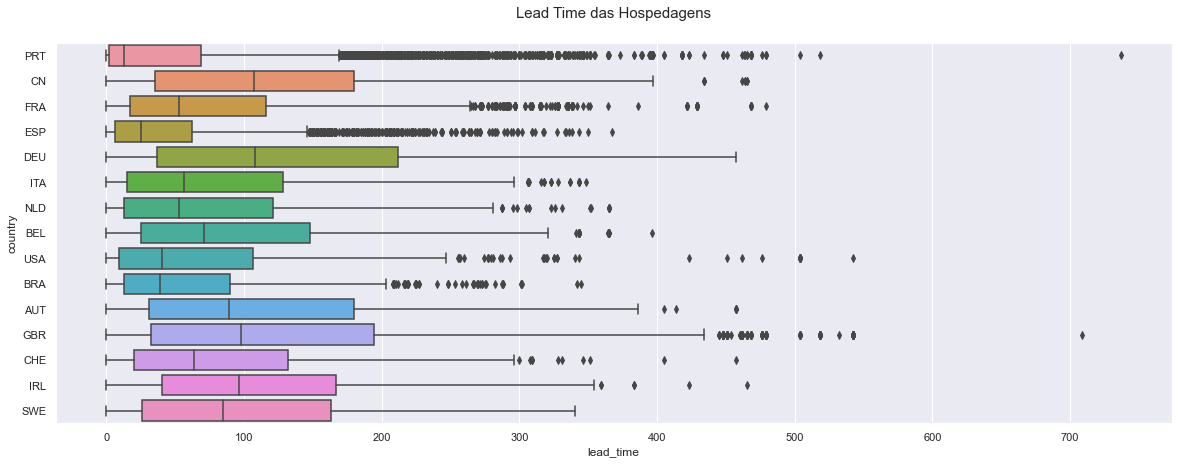

In [390]:
#Seleção dos 15 países mais visitados. 
top_paises = df_perfil_viajantes.groupby(['country']).count().sort_values(by='hotel',ascending=False).head(15).reset_index()
top_paises_visitados = top_paises.country.unique()

#Criação de um subset com apenas os 15 países mais visitados. 
aux3 = df_perfil_viajantes.query("country == ['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD','USA', 'BRA', 'CHE', 'AUT', 'CN', 'SWE']")

plt.figure(figsize=(20, 7))

#Plotagem dos gráficos do tipo BoxPlot. 
sns.boxplot(data= aux3.sort_values(by = 'lead_time') , x ="lead_time", y = "country")
sns.set(font_scale = 0.5)
plt.title('Lead Time das Hospedagens', x=0.5, y=1.05, ha='center', fontsize='15');